# DATA ANALYSIS on FESTIVE SEASON SALES DATA

## IMPORTING All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Reading the CSV file into pandas**

In [2]:
data=pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

# Data Cleaning

In [3]:
data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


**Shape tells how many rows and columns are present in the DataFrame (row,column)**

In [4]:
data.shape

(11251, 15)

**INFO method gives all requisite details about DataFrame**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**From Above we can infer 'Status' and 'unnamed1' have ALL null values ,
So we DROP the Columns that contains ALL Null values**

In [6]:
data.drop(['Status','unnamed1'], axis=1, inplace=True)

**'Amount' Column also contains 12 null values that needs to be Cleaned**

In [7]:
data['Amount'].isnull().sum(axis=0)

12

In [8]:
data.dropna(subset=['Amount'],axis=0,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


**Here We want to change the Data type of 'Amount' from FLOAT to INT** 

In [10]:
data['Amount'].dtype

dtype('float64')

In [11]:
data['Amount'] = data['Amount'].astype('int')

In [12]:
data['Amount'].dtype

dtype('int32')

In [13]:
data['Amount']

0        23952
1        23934
2        23924
3        23912
4        23877
         ...  
11246      370
11247      367
11248      213
11249      206
11250      188
Name: Amount, Length: 11239, dtype: int32

**Here We display all the Statistical data of Specific Columns using DESCRIBE() method.**

In [14]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [15]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Gender

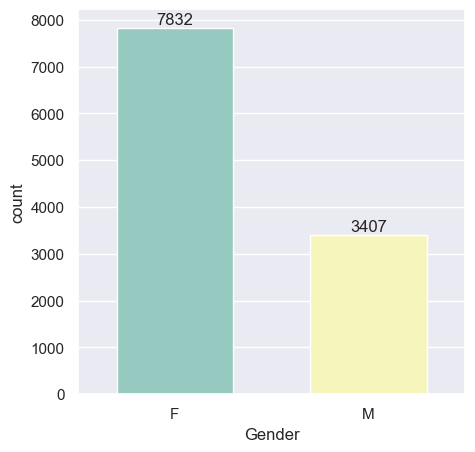

In [69]:
ax = sns.countplot( x='Gender', data=data, hue='Gender', palette='Set3',width=0.6)

for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
sales_gender= data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [18]:
sales_gender

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

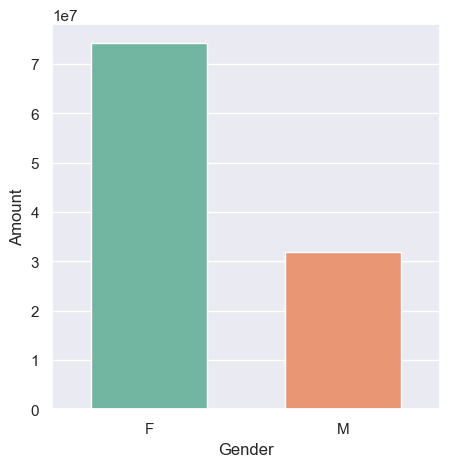

In [68]:
#Purchasing power based on Gender

sns.barplot(x='Gender',y='Amount', data=sales_gender,hue='Gender', palette='Set2',width=0.6)

***We conclude from above 2 graphs that Maximum Buyers are Female and females have greater Purchasing Power too.***

## Age

In [20]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

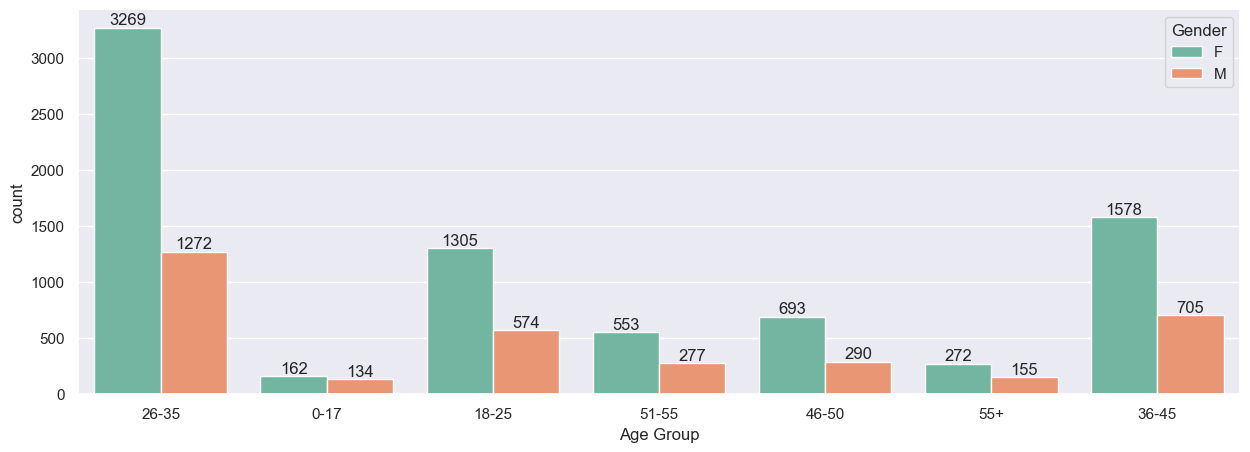

In [50]:
sales_age=sns.countplot( x='Age Group', data=data, hue='Gender',palette='Set2')

for bars in sales_age.containers:
    sales_age.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

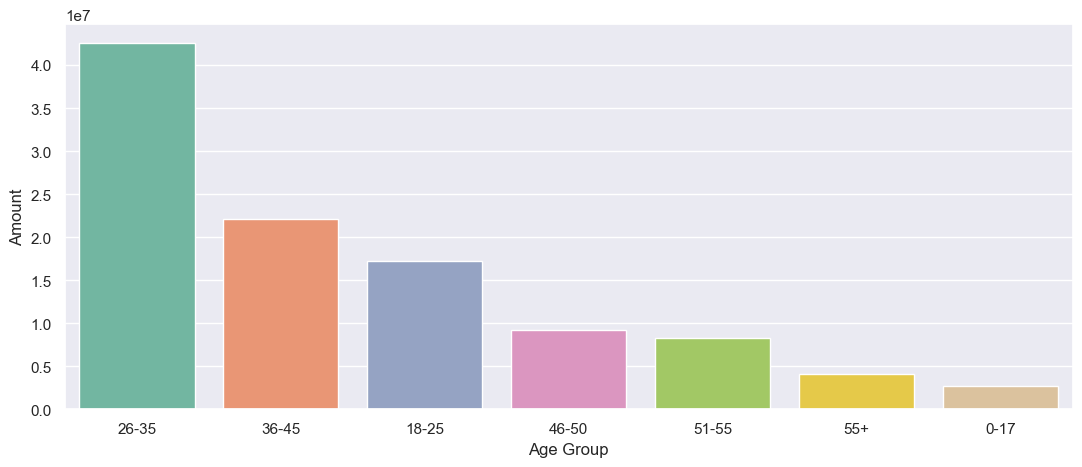

In [82]:
#Purchasing power based on Age Group

sales_amt=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x='Age Group',y='Amount',data=sales_amt,hue='Age Group', palette='Set2')

***We can infer from above graphs that Most Buyers are age group of 26-35yr Females.***

## State

In [23]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

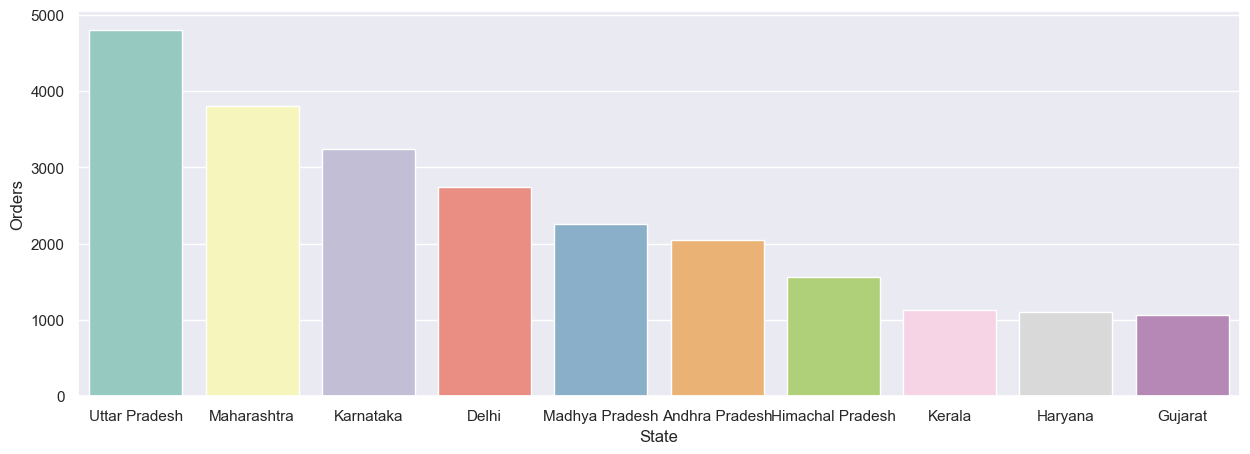

In [43]:
# Total no of Orders by Top 10 States

orders_st10=data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data=orders_st10,hue='State', palette='Set3')

<Axes: xlabel='State', ylabel='Amount'>

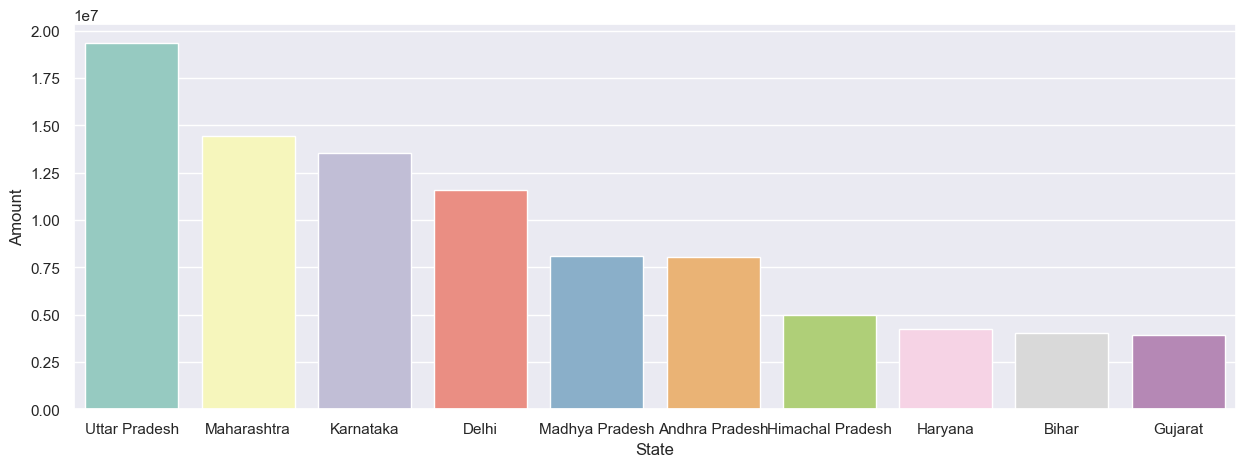

In [40]:
# Total Amount or Sales in Top 10 States

sales_st10=data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount',data=sales_st10,hue='State', palette='Set3')

***From above graphs we see that most orders/sales are made in Uttar Pradesh,Maharashtra and Karnataka respectively.***

## Marital_Status

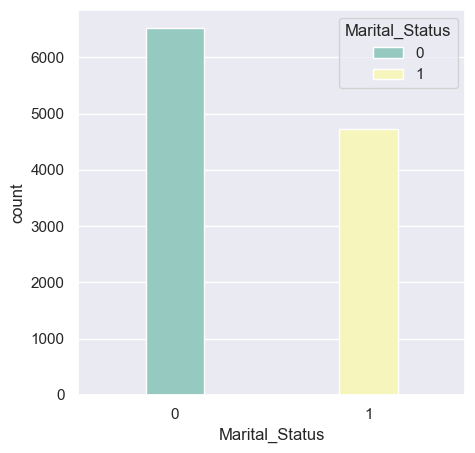

In [73]:
#Total no of sales on basis on Marital Status

sns.countplot(x='Marital_Status',data=data, hue='Marital_Status', palette='Set3',width=0.3)
sns.set(rc={'figure.figsize':(5,2)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

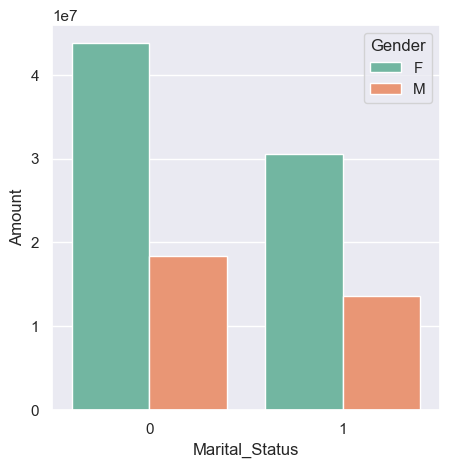

In [36]:
#Amount spend by buyers grouped by their marital status and gender

sales_ms=data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Marital_Status',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=sales_ms,hue='Gender',palette='Set2')

***From above graphs we see that most buyers are marries(Women) with higher purchasing power as well***

## Occupation

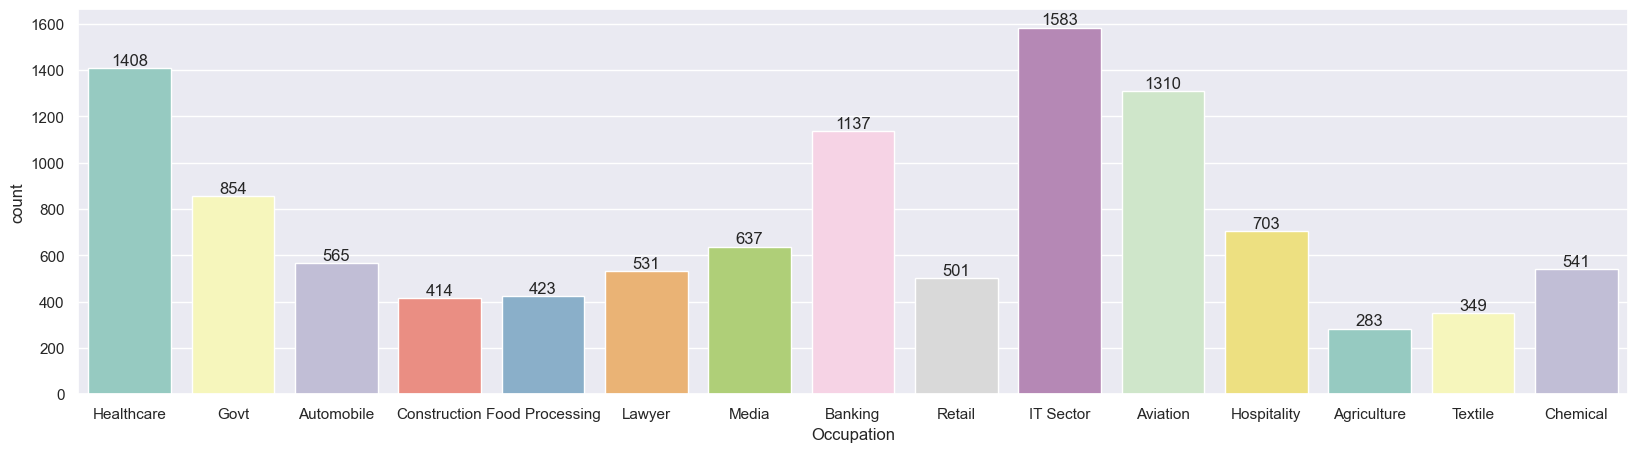

In [90]:
#Total no of sales count from each profession

sns.set(rc={'figure.figsize':(20, 5)})
ax=sns.countplot(x='Occupation',data=data,hue='Occupation',palette='Set3')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

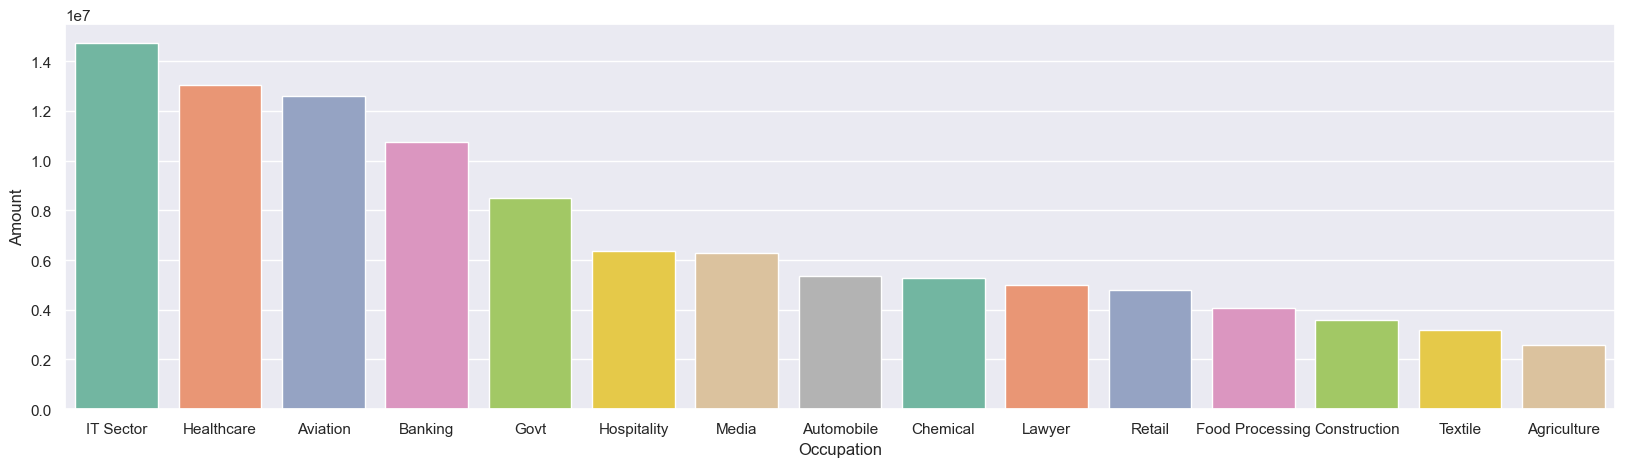

In [93]:
#Purchasing Power of each profession

sales_occ=data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Occupation',y='Amount',data=sales_occ,hue='Occupation',palette='Set2')

***We conclude from above 2 graphs that most buyers belong to IT, Healthcare and Aviation sector***

## Product Category

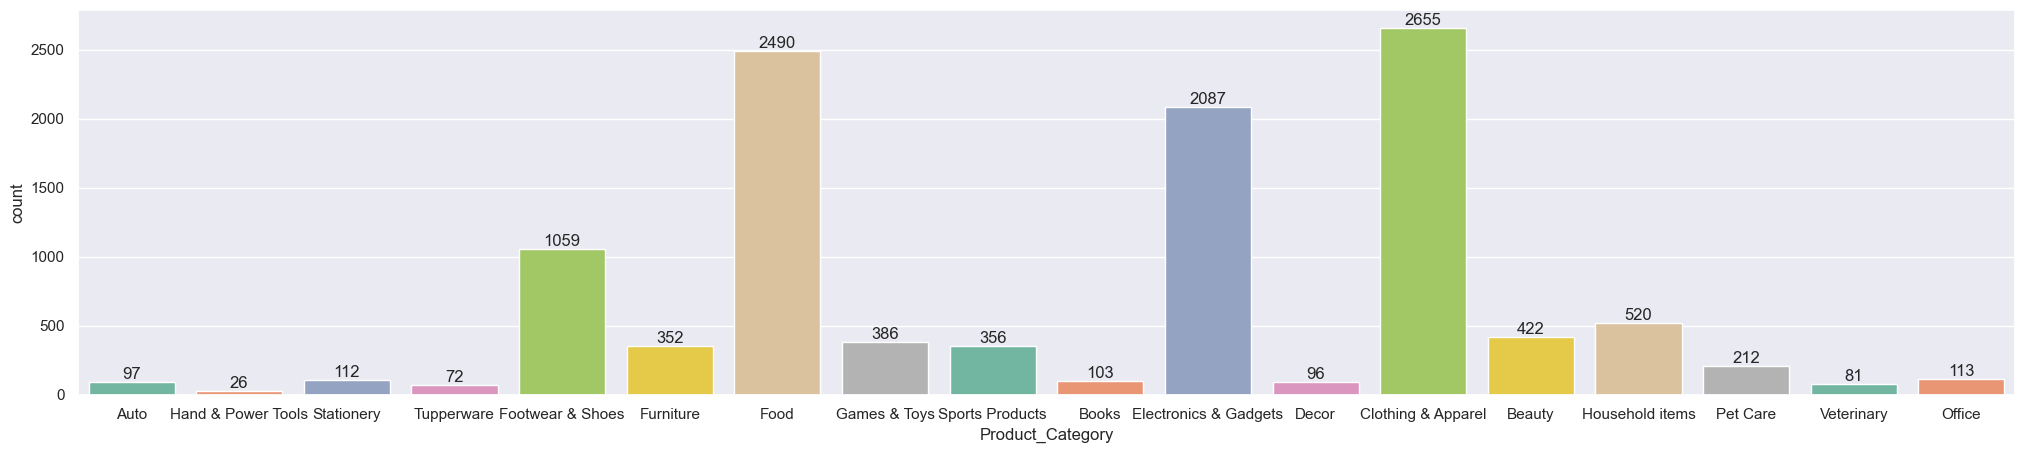

In [107]:
#Total no of sales count for each product category

sns.set(rc={'figure.figsize':(25, 5)})
ax=sns.countplot(x='Product_Category',data=data,hue='Product_Category',palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

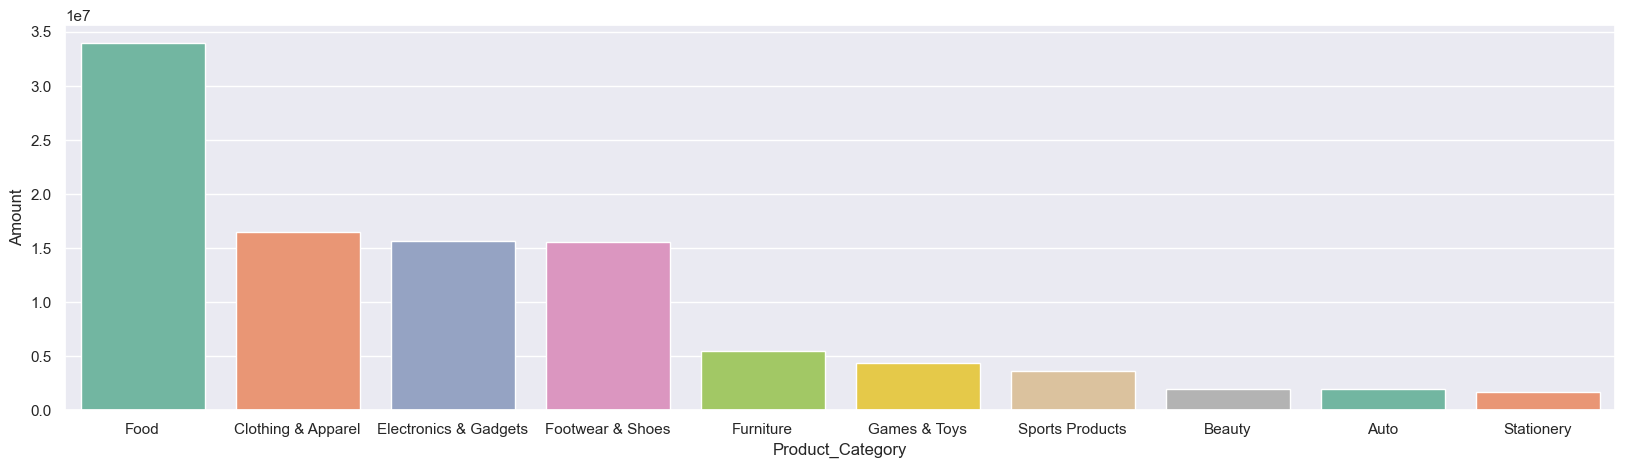

In [102]:
#Aggregate amount for each category

sales_pc=data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=sales_pc,hue='Product_Category',palette='Set2')

***From above graphs we infer most selling product categories are Food,Clothing and Electronics item.***

<Axes: xlabel='Product_ID', ylabel='Orders'>

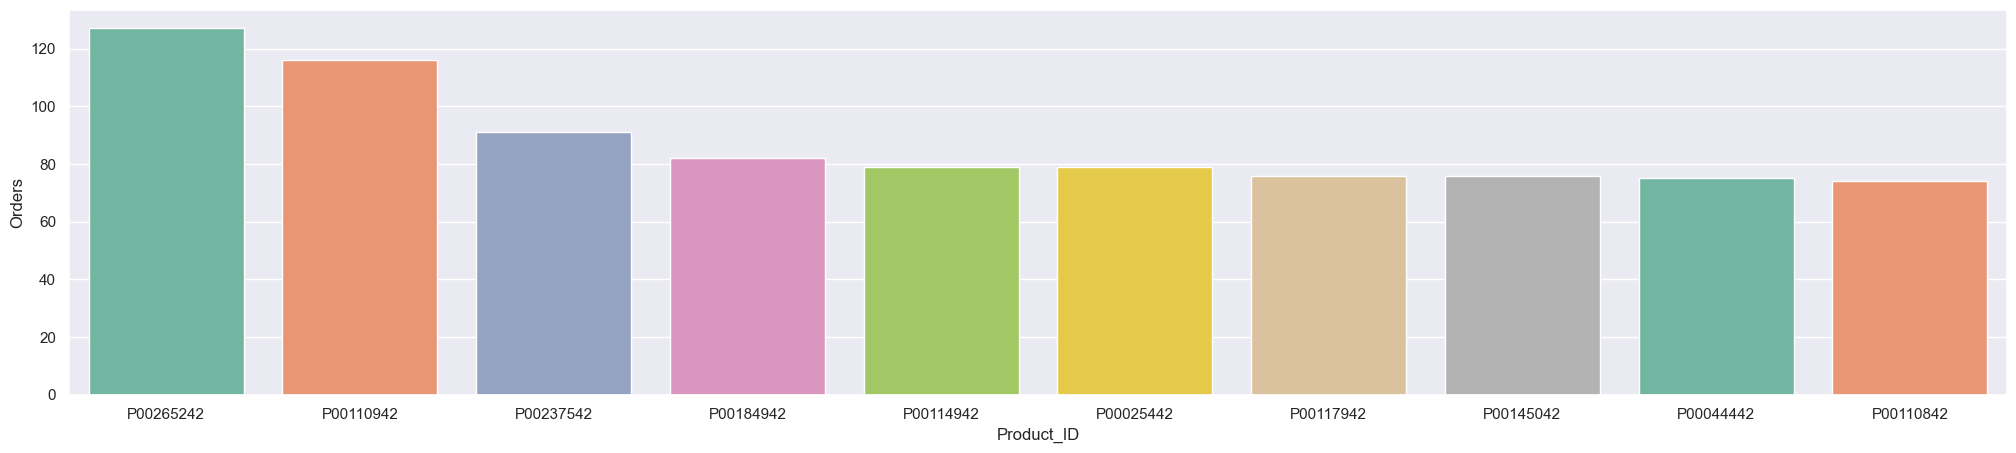

In [112]:
#Top Selling 10 Selling Products

sales_id=data.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='Product_ID',y='Orders',data=sales_id,hue='Product_ID',palette='Set2')

## INSIGHTS:

### Finally We concluded, Married Women belonging to age group of 26-35yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are Most likely to buy products from Food, Clothing and Electronics category.